In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')



In [64]:
df = pd.read_csv("C:\\Users\\Simmy\\Desktop\\MY DS FOLDER\\cervical.csv")

In [65]:
df.head()

,Unnamed: 0,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,...,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,...,0.0,0,1,0,1,0,0,0,0,0
3,4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,...,0.0,0,0,0,0,0,0,0,0,0
4,5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [66]:
df.columns # considered as features 

Index(['Unnamed: 0', 'Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD',
       'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',
       'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis',
       'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis',
       'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes',
       'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV',
       'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer',
       'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology',
       'Biopsy'],
      dtype='object')

In [67]:
df.shape # checking dimension 

(838, 35)

In [68]:
df.info() # information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          838 non-null    int64  
 1   Age                                 838 non-null    int64  
 2   No_of_sex_partner                   838 non-null    float64
 3   First_sexual_intercourse            838 non-null    float64
 4   No_pregnancies                      838 non-null    float64
 5   Smokes                              838 non-null    float64
 6   Smokes_yrs                          838 non-null    float64
 7   Smokes_packs_yr                     838 non-null    float64
 8   Hormonal_Contraceptives             838 non-null    float64
 9   Hormonal_Contraceptives_years       838 non-null    float64
 10  IUD                                 838 non-null    float64
 11  IUD_years                           838 non-n

In [69]:
# Replace ? with Nan
df = df.replace('?',np.NaN)

In [70]:
df.isnull().sum().any() # there is no null values

False

In [71]:
df.isnull().sum() 

Unnamed: 0                            0
Age                                   0
No_of_sex_partner                     0
First_sexual_intercourse              0
No_pregnancies                        0
Smokes                                0
Smokes_yrs                            0
Smokes_packs_yr                       0
Hormonal_Contraceptives               0
Hormonal_Contraceptives_years         0
IUD                                   0
IUD_years                             0
STDs                                  0
STDs_number                           0
STDs_condylomatosis                   0
STDs_cervical_condylomatosis          0
STDs_vaginal_condylomatosis           0
STDs_vulvo_perineal_condylomatosis    0
STDs_syphilis                         0
STDs_pelvic_inflammatory_disease      0
STDs_genital_herpes                   0
STDs_molluscum_contagiosum            0
STDs_AIDS                             0
STDs_HIV                              0
STDs_Hepatitis_B                      0


In [72]:
x_features_categorical=['Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD',
       'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',
       'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis',
       'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis',
       'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes',
       'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV',
       'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'Dx_Cancer',
       'Dx_CIN', 'Dx_HPV', 'Dx']
x_features_categorical

['Smokes',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives',
 'Hormonal_Contraceptives_years',
 'IUD',
 'IUD_years',
 'STDs',
 'STDs_number',
 'STDs_condylomatosis',
 'STDs_cervical_condylomatosis',
 'STDs_vaginal_condylomatosis',
 'STDs_vulvo_perineal_condylomatosis',
 'STDs_syphilis',
 'STDs_pelvic_inflammatory_disease',
 'STDs_genital_herpes',
 'STDs_molluscum_contagiosum',
 'STDs_AIDS',
 'STDs_HIV',
 'STDs_Hepatitis_B',
 'STDs_HPV',
 'STDs_No_of_diagnosis',
 'Dx_Cancer',
 'Dx_CIN',
 'Dx_HPV',
 'Dx']

In [73]:
x_features_numerical=[]

In [74]:

x_features_numerical=['Unnamed: 0', 'Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies','Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives_years',
 'IUD_years',
 'STDs_number',
 'STDs_No_of_diagnosis',
 'Hinselmann',
 'Schiller',
 'Citology']
x_features_numerical

['Unnamed: 0',
 'Age',
 'No_of_sex_partner',
 'First_sexual_intercourse',
 'No_pregnancies',
 'Smokes_yrs',
 'Smokes_packs_yr',
 'Hormonal_Contraceptives_years',
 'IUD_years',
 'STDs_number',
 'STDs_No_of_diagnosis',
 'Hinselmann',
 'Schiller',
 'Citology']

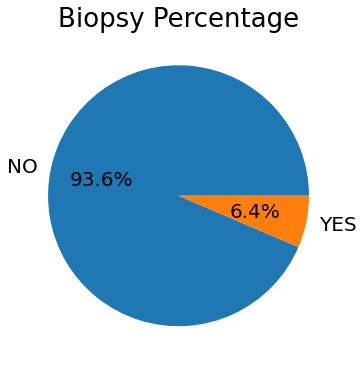

In [75]:
impute = df.copy()
impute=df.astype('float')

plt.figure(figsize = (10,6))
plt.pie(impute['Biopsy'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Biopsy Percentage', fontsize=26)
plt.show()

Count Plots of Categorical columns

****************************************************************************************************


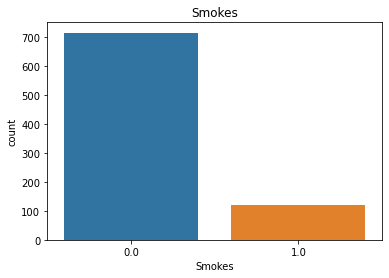

****************************************************************************************************


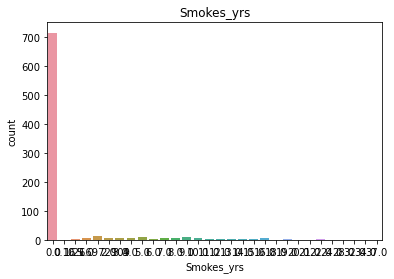

****************************************************************************************************


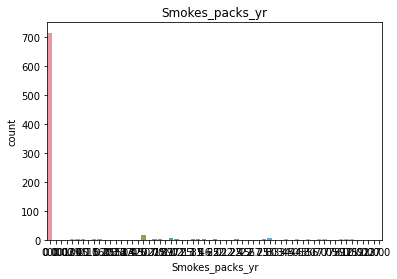

****************************************************************************************************


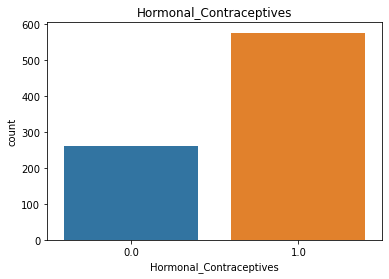

****************************************************************************************************


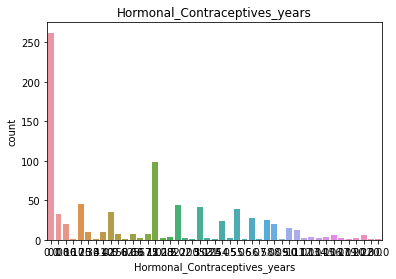

****************************************************************************************************


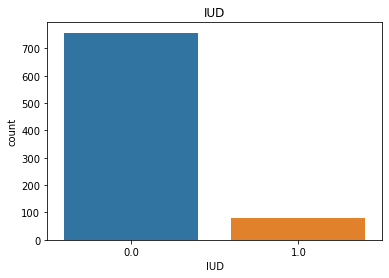

****************************************************************************************************


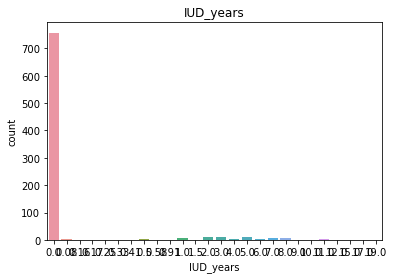

****************************************************************************************************


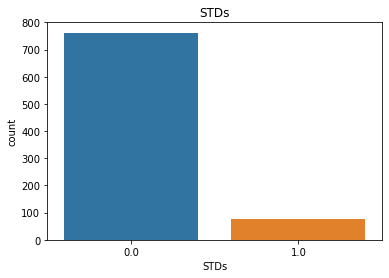

****************************************************************************************************


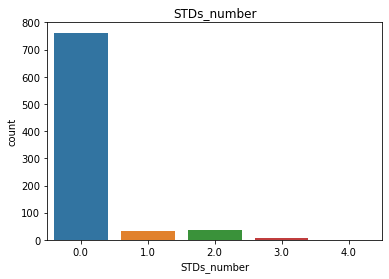

****************************************************************************************************


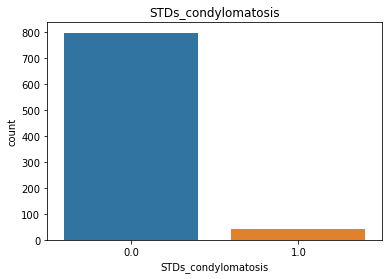

****************************************************************************************************


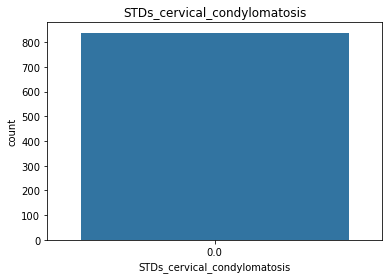

****************************************************************************************************


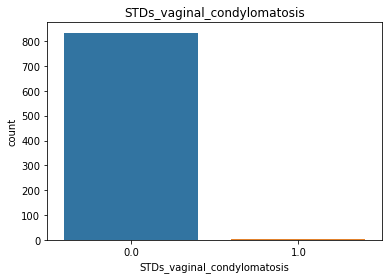

****************************************************************************************************


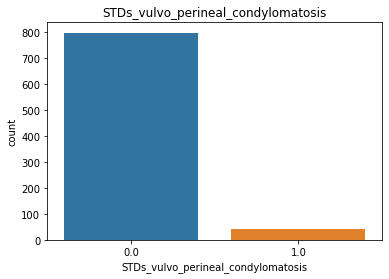

****************************************************************************************************


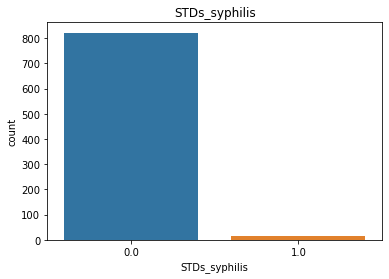

****************************************************************************************************


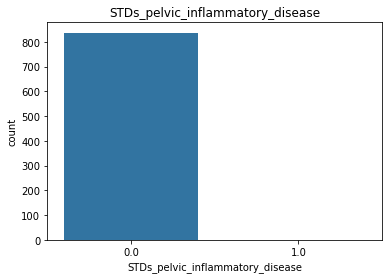

****************************************************************************************************


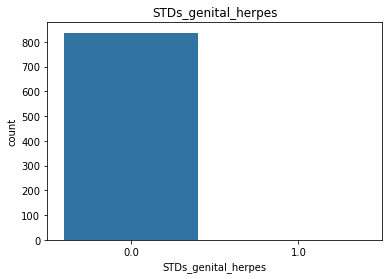

****************************************************************************************************


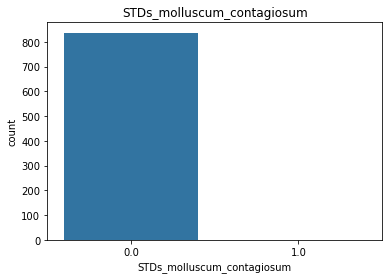

****************************************************************************************************


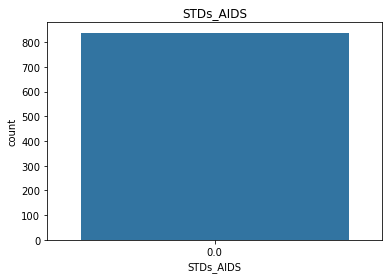

****************************************************************************************************


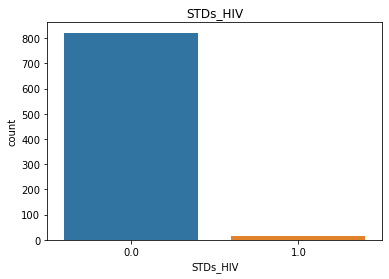

****************************************************************************************************


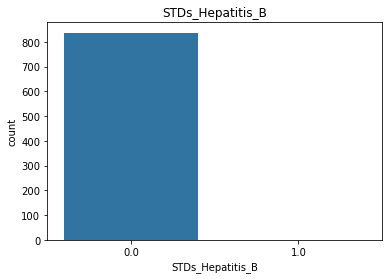

****************************************************************************************************


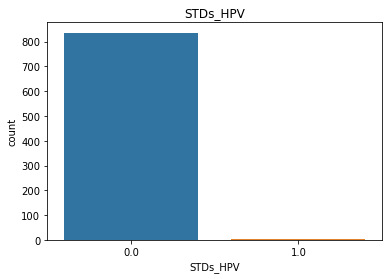

****************************************************************************************************


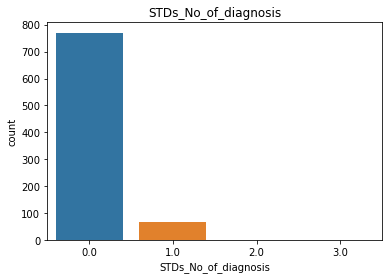

****************************************************************************************************


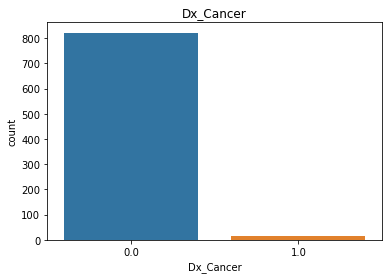

****************************************************************************************************


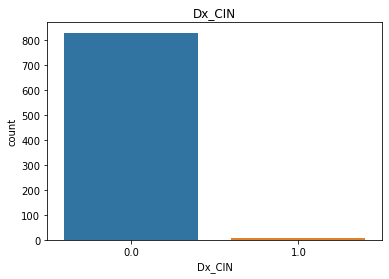

****************************************************************************************************


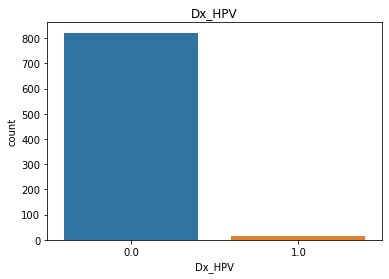

****************************************************************************************************


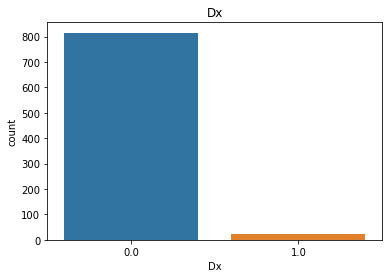

In [76]:
# Imbalance data
print('Count Plots of Categorical columns');print()
for i in impute [x_features_categorical]:
    print('*'*100)
    sns.countplot(impute[i])
    plt.title(i)
    plt.show()

In [78]:
#Building the Model
#defining my X's and Y's
x=df.drop('Dx_Cancer',axis=1) # dropping the Target, here all ithe independent values
y=df['Dx_Cancer'] # Target or the dependent value

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32) # 0.3 
#  means 30% data for training 



In [87]:
tree=RandomForestClassifier()

#defining tree param for grid based search
tree_params={
    "criterion":["gini", "entropy"],
    "splitter":["best", "random"],
    "max_depth":[3,4,5,6],
    "max_features":["auto","sqrt","log2"],
    "random_state":[123]
    }

In [88]:
Rf_model=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
model_tree=tree.fit(x_train,y_train)
pred_tree=tree.predict(x_test)
f1_score(y_test,pred_tree)

0.25